## 4.2.1 Functional and Object-Oriented Approaches to Plotting

In [7]:
%matplotlib inline

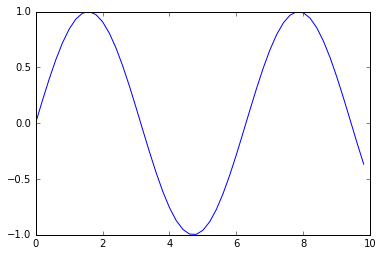

In [8]:
# Import the required packages,
# with their conventional names
import matplotlib.pyplot as plt
import numpy as np
# Generate the data
x = np.arange(0, 10, 0.2)
y = np.sin(x)
# Generate the plot
plt.plot(x, y)
# Display it on the screen
plt.show()

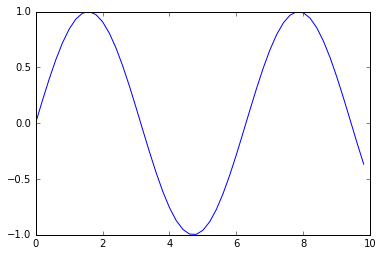

In [9]:
# Generate the plot
fig = plt.figure() # Generate the figure
ax = fig.add_subplot(111) # Add an axis to that figure
ax.plot(x,y) # Add a plot to that axis

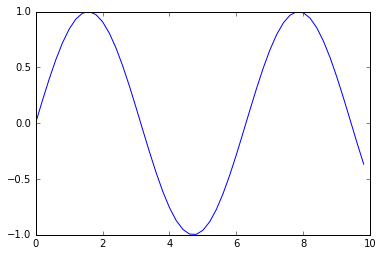

In [10]:
from pylab import *
x = arange(0, 10, 0.2)
y = sin(x)
plot(x, y)
show()

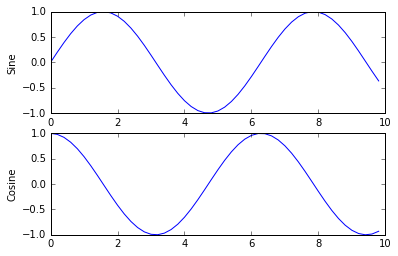

In [11]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np
# Generate the data
x = np.arange(0, 10, 0.2)
y = np.sin(x)
z = np.cos(x)
# Generate the figure and the axes
fig, axs = plt.subplots(nrows=2, ncols=1)
# On the first axis, plot the sine and label the ordinate
axs[0].plot(x,y)
axs[0].set_ylabel('Sine')
# On the second axis, plot the cosine
axs[1].plot(x,z)
axs[1].set_ylabel('Cosine')
# Display the resulting plot
plt.show()

In [ ]:
# %load L4_1_interactivePlots.py
# Source: http://scipy-central.org/item/84/1/simple-interactive-matplotlib-plots

'''Interactive graphs with Matplotlib have haunted me. So here I have collected a number of
tricks that should make interactive use of plots simpler. The functions below show how to

- Position figures on the screen (e.g. top left half of display)
- Pause to display the plot, and proceed automatically after a few sec
- Proceed on a click, or a keyboard hit
- Evaluate keyboard inputs

author: Thomas Haslwanter
date:   Nov-2015
ver:    1.1
license: CC BY-SA 4.0

'''
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt

# additional packages
try:
    import tkinter as tk
except ImportError:     #different capitalization in Python 2.x
    import Tkinter as tk

t = np.arange(0,10,0.1)
c = np.cos(t)
s = np.sin(t)

def normalPlot():
    '''Just show a plot. The progam stops, and only continues when the plot is closed,
    either by hitting the "Window Close" button, or by typing "ALT+F4". '''
    
    plt.plot(t,s)
    plt.title('Normal plot: you have to close it to continue\nby clicking the "Window Close" button, or by hitting "ALT+F4"')
    plt.show()
    
def positionOnScreen():
    '''Position two plots on your screen. This uses the Tickle-backend, which I think is the default on all platforms.'''
    
    # Get the screen size
    root = tk.Tk()
    (screen_w, screen_h) = (root.winfo_screenwidth(), root.winfo_screenheight())
    root.destroy()
    
    def positionFigure(figure, geometry):
        '''Position one figure on a given location on the screen.
        This works for Tk and for Qt5 backends, but may fail on others.'''
        
        mgr = figure.canvas.manager
        (pos_x, pos_y, width, height) = geometry
        try:
            # positioning commands for Tk
            position = '{0}x{1}+{2}+{3}'.format(width, height, pos_x, pos_y)
            mgr.window.geometry(position)
        except TypeError:
            # positioning commands for Qt5
            mgr.window.setGeometry(pos_x, pos_y, width, height)
        
    # The program continues after the first plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t,c)
    ax.set_title('Top Left: Close this one last')
    
    # Position the first graph in the top-left half of the screen
    topLeft = (0, 0, screen_w//2, screen_h//2)
    positionFigure(fig, topLeft)
    
    # Put another graph in the top right half
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.plot(t,s)
    # I don't completely understand why this one has to be closed first. But otherwise the program gets unstable.
    ax2.set_title('Top Right: Close this one first (e.g. with ALT+F4)')

    topRight = (screen_w//2, 0, screen_w//2, screen_h//2)
    positionFigure(fig2, topRight)
    
    plt.show()

def showAndPause(): 
    '''Show a plot only for 2 seconds, and then proceed automatically'''
    plt.plot(t,s)
    plt.title('Don''t touch! I will proceed automatically.')
    
    plt.show(block=False)
    duration = 2    # [sec]
    plt.pause(duration)
    plt.close()
    
def waitForInput():    
    ''' This time, proceed with a click or by hitting any key '''
    plt.plot(t,c)
    plt.title('Click in that window, or hit any key to continue')
    
    plt.waitforbuttonpress()
    plt.close()

def keySelection():
    '''Wait for user intput, and proceed depending on the key entered.
    This is a bit complex. But None of the versions I tried without
    key binding were completely stable.'''
    
    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('key_press_event', on_key_event)
    
    # Disable default Matplotlib shortcut keys:
    keymaps = [param for param in plt.rcParams if param.find('keymap') >= 0]
    for key in keymaps:
        plt.rcParams[key] = ''
    
    ax.plot(t,c)
    ax.set_title('First, enter a vowel:')
    plt.show()
    
def on_key_event(event):
    '''Keyboard interaction'''

    #print('you pressed %s'%event.key)        
    key = event.key

    # In Python 2.x, the key gets indicated as "alt+[key]"
    # Bypass this bug:
    if key.find('alt') == 0:
        key = key.split('+')[1]

    curAxis = plt.gca()
    if key in 'aeiou':
        curAxis.set_title('Well done!')
        plt.pause(1)
        plt.close()
    else:
        curAxis.set_title(key + ' is not a vowel: try again to find a vowel ....')
        plt.draw()
    
if __name__ == '__main__':
    normalPlot()    
    positionOnScreen()    
    showAndPause()    
    waitForInput()    
    keySelection()


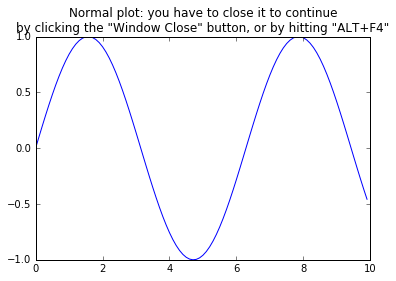

AttributeError: 'FigureManagerBase' object has no attribute 'window'

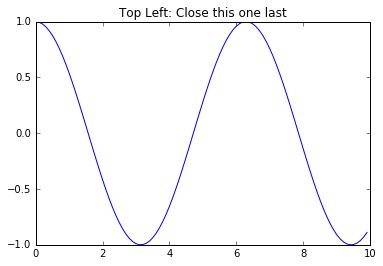

In [13]:
%run L4_1_interactivePlots.py